<a href="https://colab.research.google.com/github/smjimenez97/k-means/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#cargamos los datos
data = pd.read_csv('Wholesale customers data.csv')

In [4]:
#Conocer la forma de los datos
data.shape

(440, 8)

In [5]:
#Conocer los datos nulos
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
#conocer el formato de los datos
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
#Datos de muestra
#seleccionamos unos datos al azar para posteriormente verificar el clúster
#al que pertenecen
indices = [26,176,392]
muestras = pd.DataFrame(data.loc[indices],
                        columns = data.keys()).reset_index(drop=True)

In [8]:
data = data.drop(indices, axis=0)

In [9]:
#Procesamiento de los datos
#Eliminamos las columnas de región y canal
data = data.drop(['Region', 'Channel'], axis=1)
muestras = muestras.drop(['Region', 'Channel'], axis=1)

In [15]:
#escalamiento de los datos
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [16]:
#Análisis de Machine Learning
from sklearn.cluster import KMeans
#Se determina las variables a evaluar
x = data_escalada.copy()

In [17]:
#Hallar el valor óptimo de K
#Se aplicará el método de codo para hallar K
#Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = []
for i in range(1,20):
  algoritmo = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
  algoritmo.fit(x)
  #para cada K, se calcula la suma total del cuadrado dentro del clúster
  inercia.append(algoritmo.inertia_)

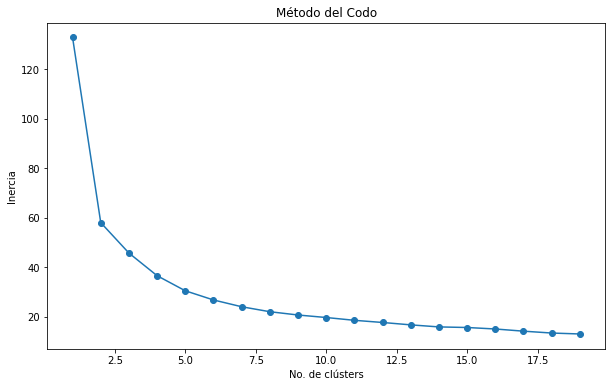

In [18]:
from matplotlib import markers
#se traza la curva de la suma de errores cuadráticos
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clústers')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)), inercia, marker='o')
plt.show()

In [19]:
#Se aplica el algoritmo de clustering
#Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10)

In [20]:
#se entrena el algoritmo
algoritmo.fit(x)

KMeans(n_clusters=6)

In [21]:
#se obtiene los datos de los centroides
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [23]:
#Utilizamos los datos de muestras y verificamos en que cluster se encuentran
muestra_prediccion = algoritmo.predict(muestras_escalada)

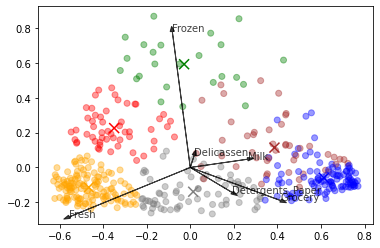

In [25]:
#Graficamos los datos junto a los resultados
#Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components=2)
modelo_pca.fit(x)
pca = modelo_pca.transform(x)

#Se aplica la reducción de dimencionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

#Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']

#Se asignan los colores a cada clúster
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:,1], c=colores_cluster, marker = 'o', alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker='x', s=100, linewidths=3, c=colores)

#se guardan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
  #Se grafican los vectores
  plt.arrow(0,0, xvector[i], yvector[i], color='black', width=0.0005, head_width=0.02, alpha=0.75)
  #Se colocan los nombres
  plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', alpha=0.75)

plt.show()